<a href="https://colab.research.google.com/github/anoushazaidii/Data-Science-Analytics/blob/main/DS%26A_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING DATA**



In [1]:
from google.colab import files
uploaded = files.upload()


Saving urban_mobility_data_past_year.csv to urban_mobility_data_past_year.csv


**CHECKING DATA TYPES AND NULL VALUES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("urban_mobility_data_past_year.csv")

print(df.dtypes)
print(df['congestion_level'].nunique())
print(df['weather_conditions'].nunique())
print(df['road_type'].nunique())
print(df['vehicle_type'].nunique())
print(df.isna().sum())
print(df.describe())
print(df.head)

timestamp              object
congestion_level      float64
weather_conditions     object
road_type              object
vehicle_type           object
temperature           float64
humidity              float64
wind_speed            float64
precipitation         float64
population_density    float64
dtype: object
32903
3
3
3
timestamp             0
congestion_level      0
weather_conditions    0
road_type             0
vehicle_type          0
temperature           0
humidity              0
wind_speed            0
precipitation         0
population_density    0
dtype: int64
       congestion_level   temperature      humidity    wind_speed  \
count      32903.000000  32903.000000  32903.000000  32903.000000   
mean           0.500828     24.981923     54.979887      9.972518   
std            0.231102      5.749231     20.250226      5.784905   
min            0.100046     15.000051     20.001948      0.000085   
25%            0.300458     19.985561     37.395179      4.970144   
50%    

**DATA CLEANING**

**P1:Identify high-congestion areas during specific weather conditions and different times of the day and suggest infrastructure improvements or traffic management strategies,**

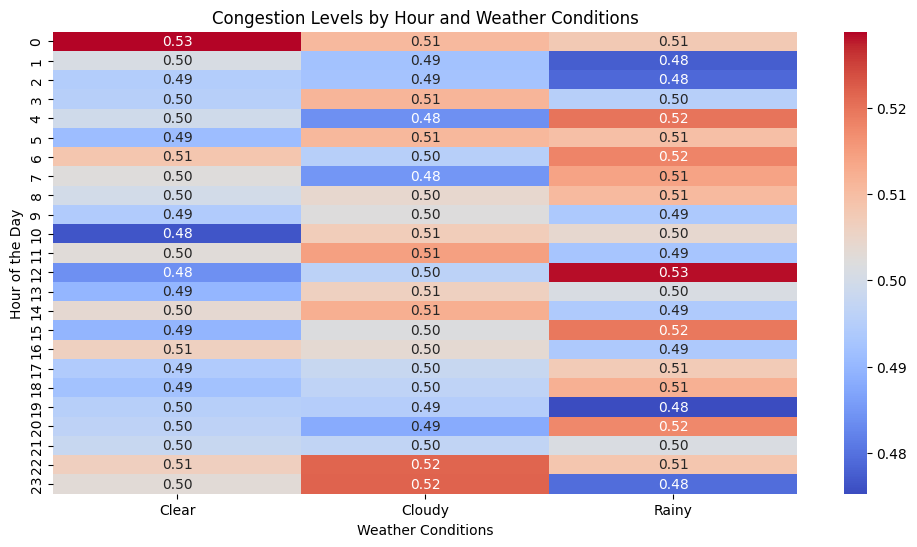

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month

# Step 2: Data Visualization
# Create a heatmap to visualize congestion levels by hour and weather conditions
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(index='hour', columns='weather_conditions', values='congestion_level', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Congestion Levels by Hour and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Hour of the Day')
plt.show()

# Step 3: Identify high-congestion areas during specific weather conditions and times
# You can define high congestion based on a threshold, e.g., congestion_level > 0.8
high_congestion_areas = df[df['congestion_level'] > 0.8]

# Step 4: Generate recommendations for traffic management and infrastructure improvements
# You can analyze the high_congestion_areas DataFrame to provide recommendations based on specific conditions.

# For example, you can identify areas with high congestion during rainy weather conditions in the morning (hour < 10):
rainy_morning_congestion = high_congestion_areas[(high_congestion_areas['weather_conditions'] == 'Rainy') & (high_congestion_areas['hour'] < 10)]




**How can we leverage the data to encourage the use of sustainable transportation modes like public transit, cycling, and walking? Are there specific weather conditions or road types that deter people from choosing these modes, and how can we address these challenges to promote eco-friendly commuting options?**

In [4]:
# Filter the dataset for sustainable transportation modes
sustainable_modes = ['Bus', 'Bicycle', 'Car']

# Filter the dataset for sustainable modes and select relevant columns
sustainable_data = df[df['vehicle_type'].isin(sustainable_modes)][['timestamp', 'vehicle_type', 'weather_conditions', 'road_type', 'temperature', 'humidity']]


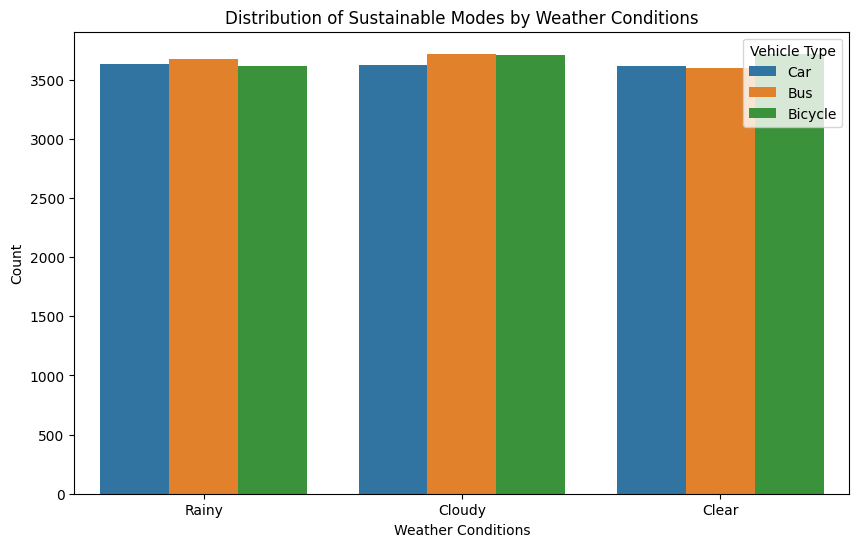

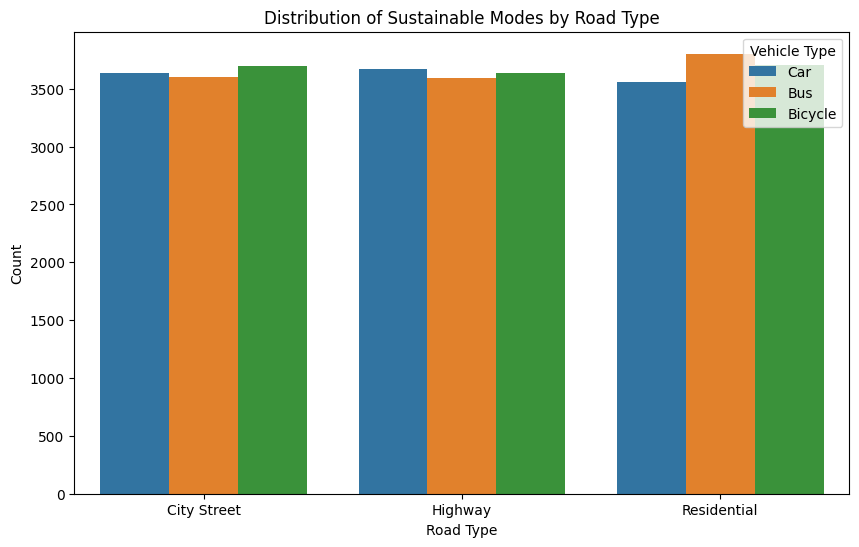

In [5]:
# Create a count plot to visualize the distribution of sustainable modes by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=sustainable_data, x='weather_conditions', hue='vehicle_type')
plt.title('Distribution of Sustainable Modes by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.show()

# Create a count plot to visualize the distribution of sustainable modes by road type
plt.figure(figsize=(10, 6))
sns.countplot(data=sustainable_data, x='road_type', hue='vehicle_type')
plt.title('Distribution of Sustainable Modes by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.show()


**Emergency Response Optimization: In the event of extreme weather conditions or emergencies, how can the data help emergency services optimize their response times and routes? Can we develop predictive models that consider weather conditions and congestion levels to ensure quicker access to affected areas and minimize disruption during critical situations**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print(df.columns)
df = df[['congestion_level', 'population_density', 'weather_conditions_Clear',
         'weather_conditions_Cloudy', 'weather_conditions_Rainy',
         'road_type_City Street', 'road_type_Highway', 'road_type_Residential']]

# Split data into train and test sets
X = df.drop('congestion_level', axis=1)
y = df['congestion_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
# Fix prediction data format
import numpy as np
original_columns = df.columns
print(len(original_columns)) # 10 columns initially

# Encode columns

encoded_columns = df.columns
print(len(encoded_columns)) # 7 columns after encoding
# Create numpy array from list
new_data = np.array([[5000, 0, 0, 1, 0, 0, 1]])
# Make prediction
new_pred = rf_reg.predict(new_data)
print(f'Predicted Congestion Level: {new_pred[0]}')

Index(['congestion_level', 'population_density', 'weather_conditions_Clear',
       'weather_conditions_Cloudy', 'weather_conditions_Rainy',
       'road_type_City Street', 'road_type_Highway', 'road_type_Residential'],
      dtype='object')
RMSE: 0.260334492032916
8
8
Predicted Congestion Level: 0.6420832837064643


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
